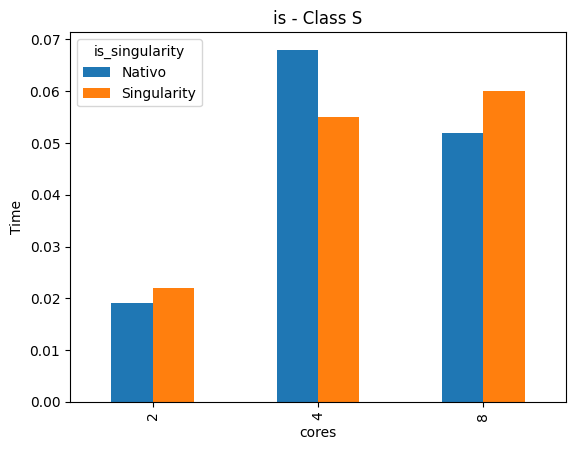

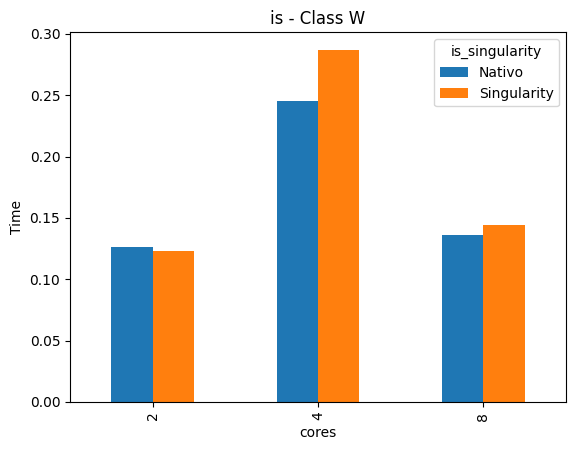

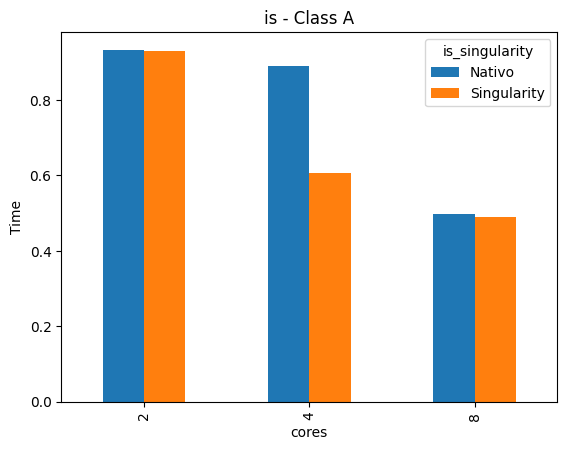

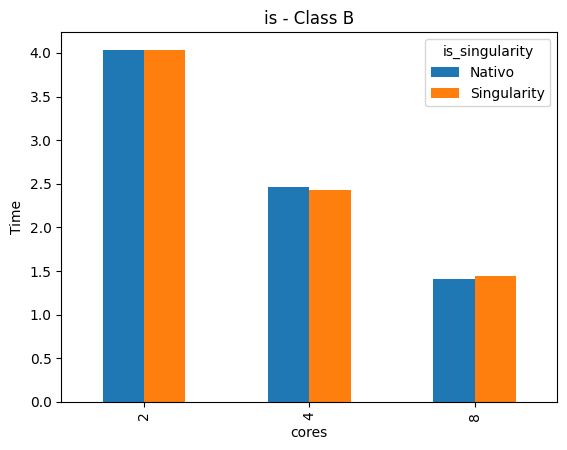

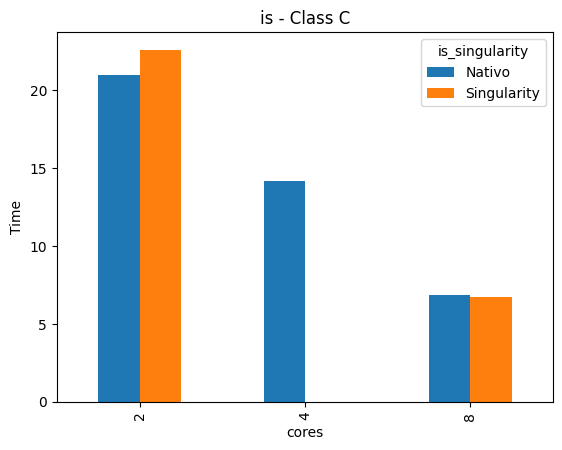

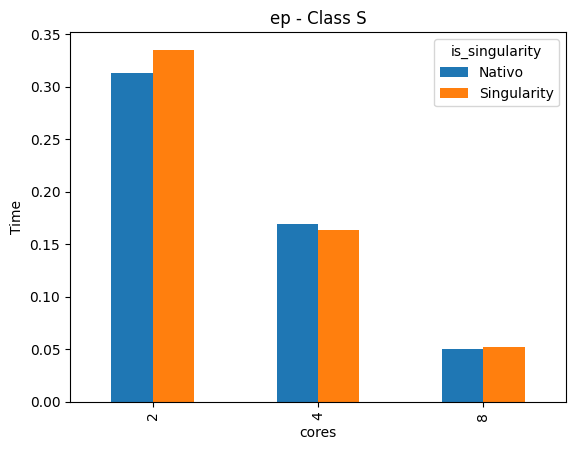

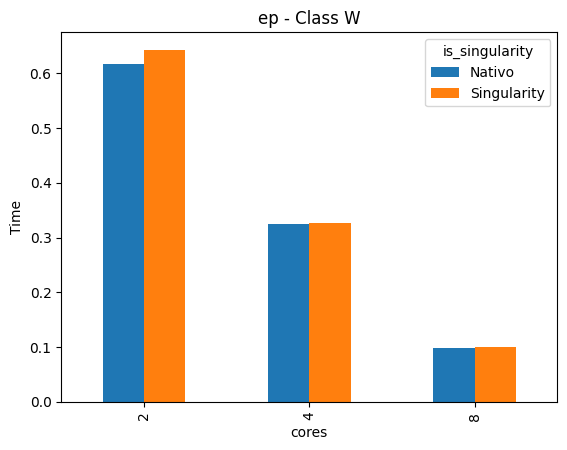

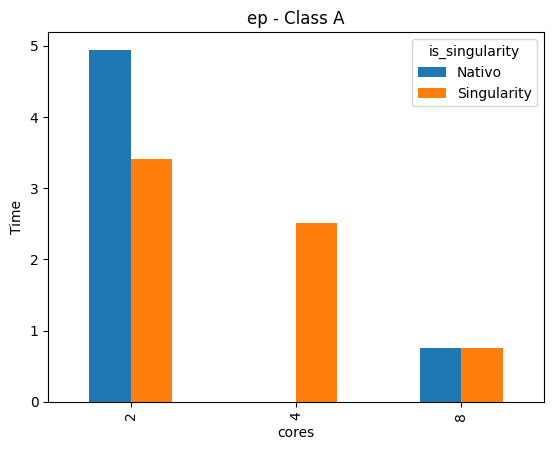

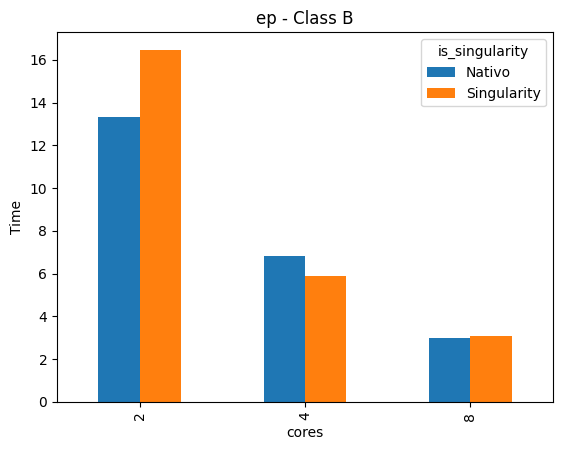

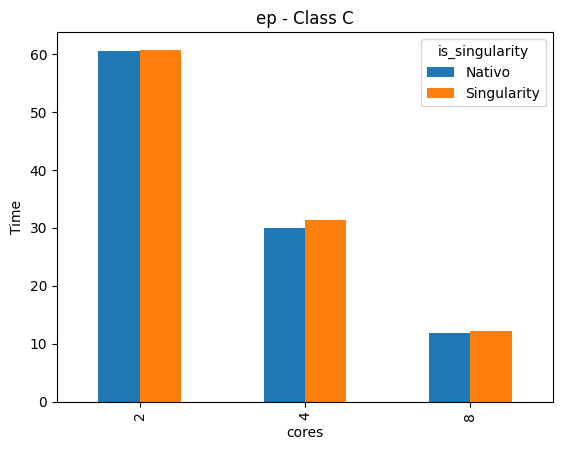

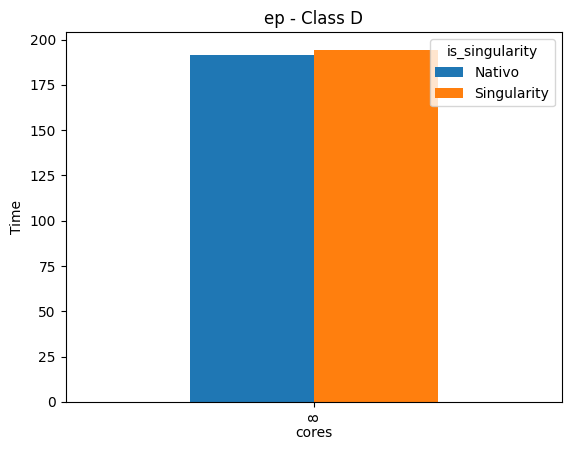

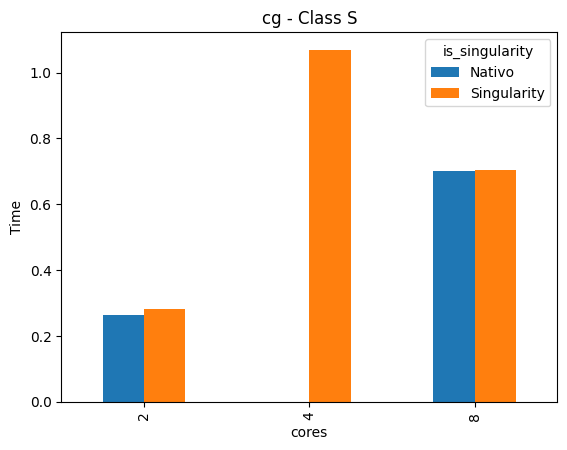

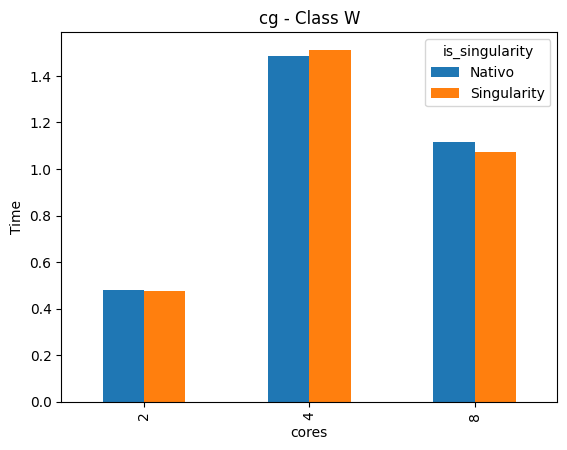

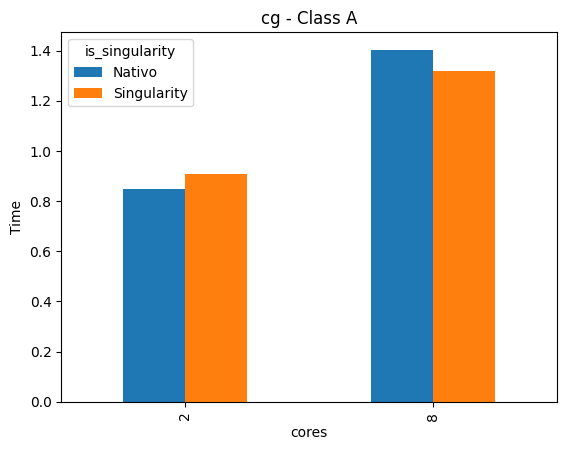

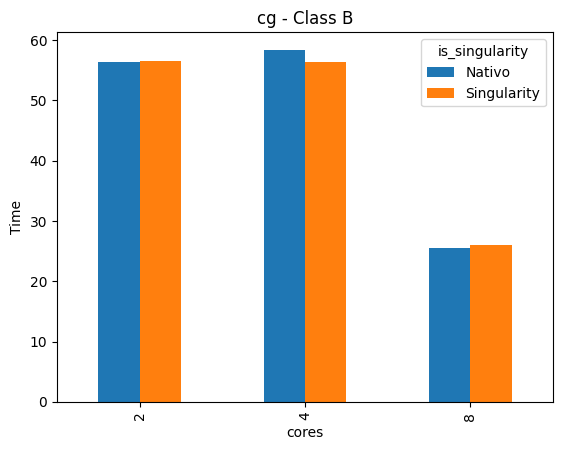

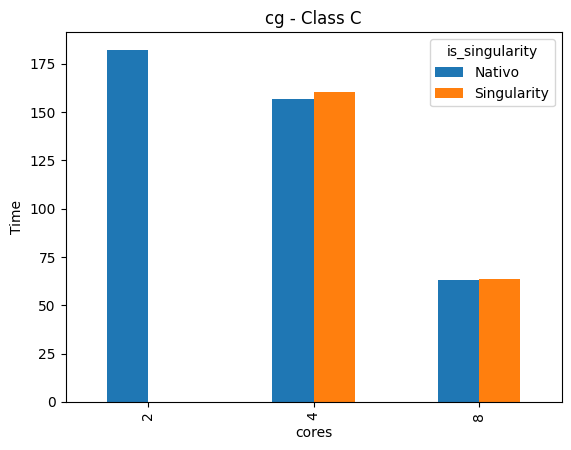

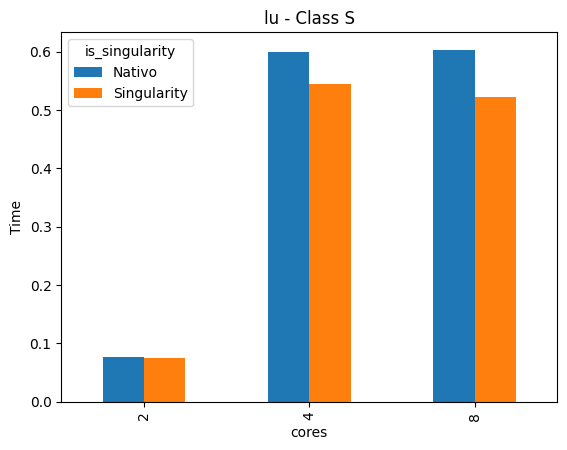

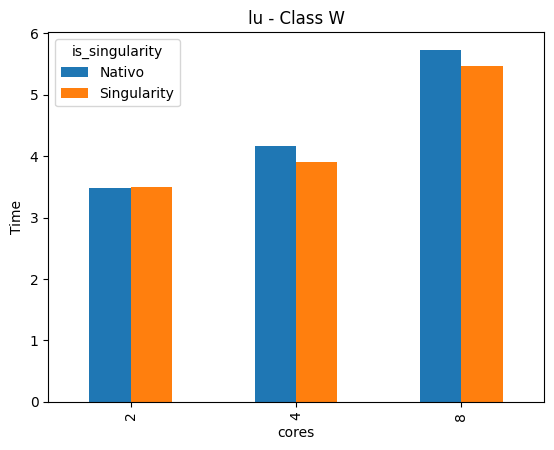

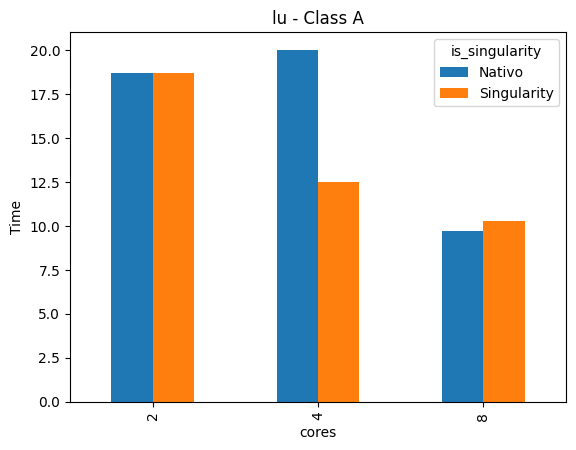

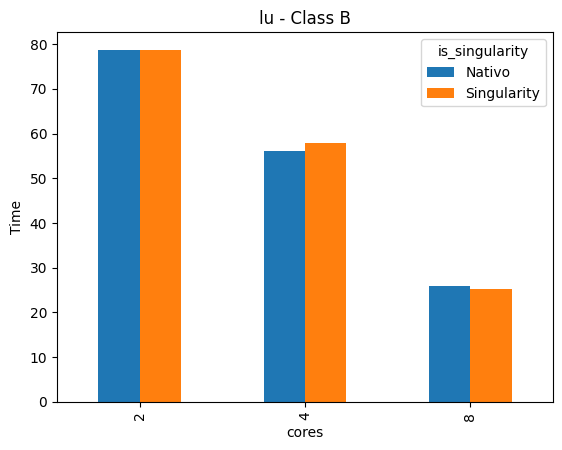

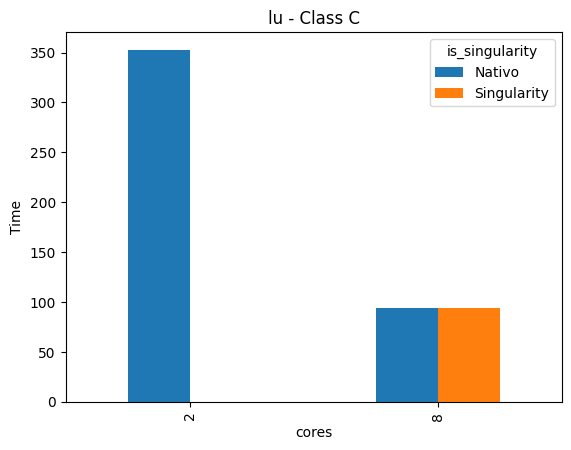

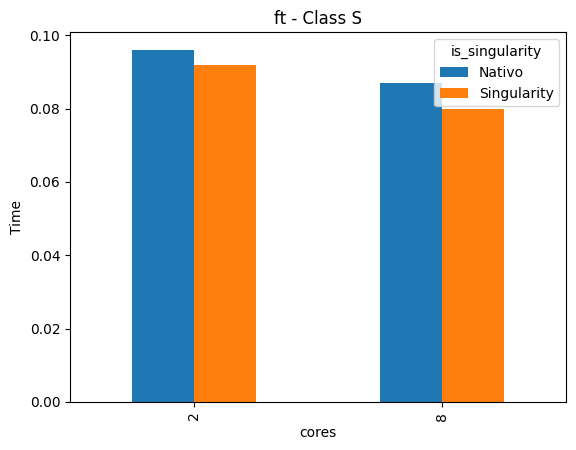

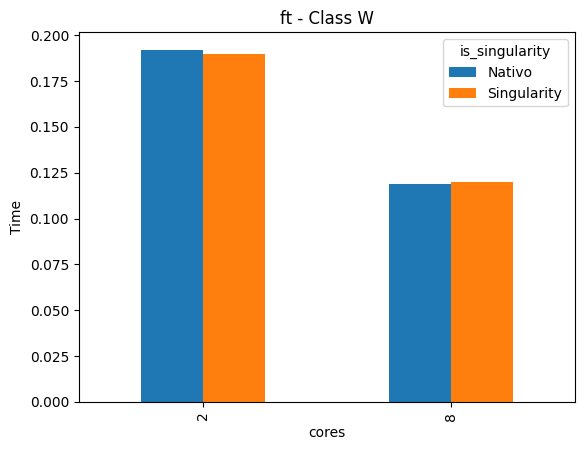

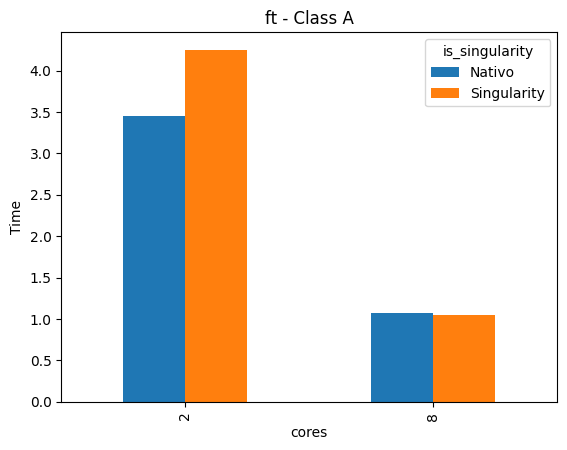

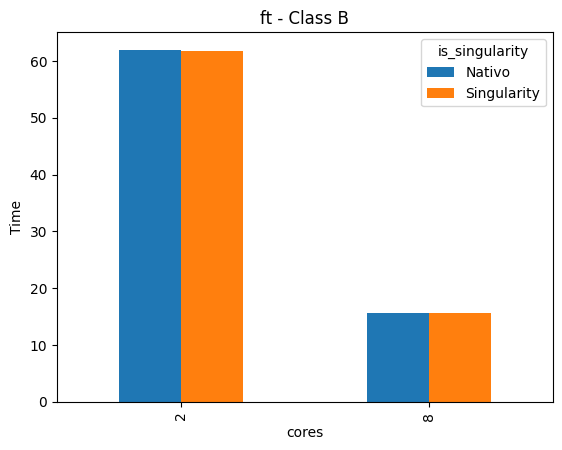

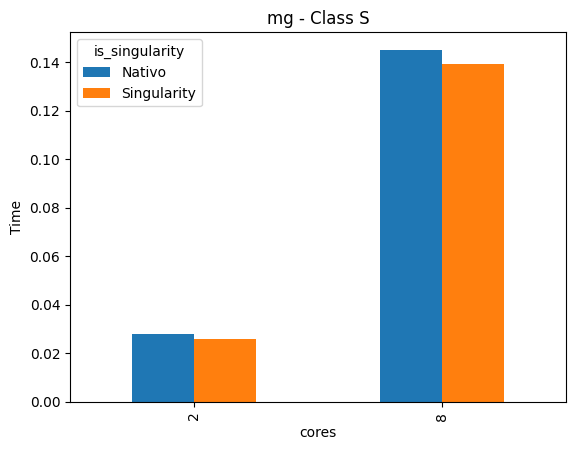

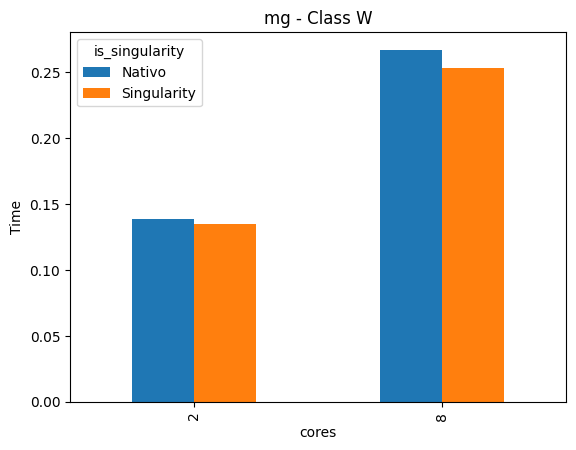

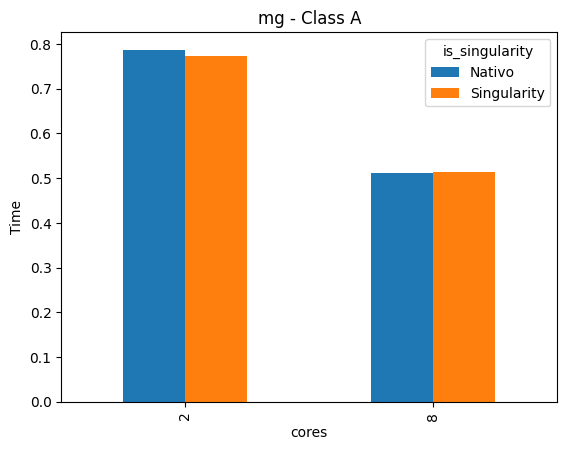

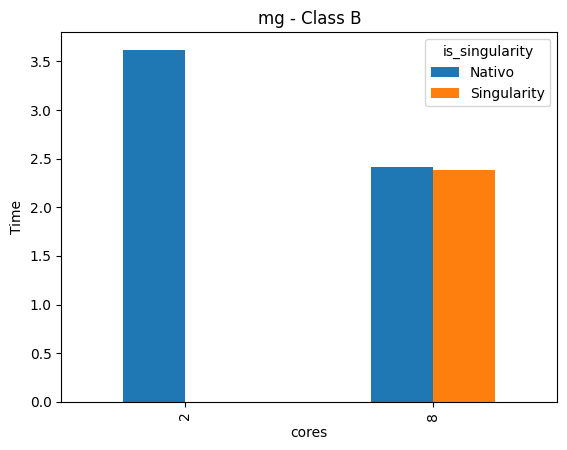

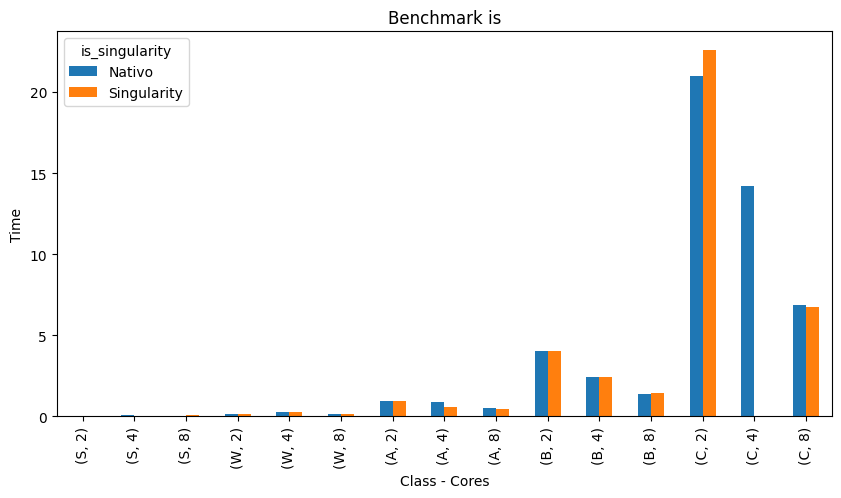

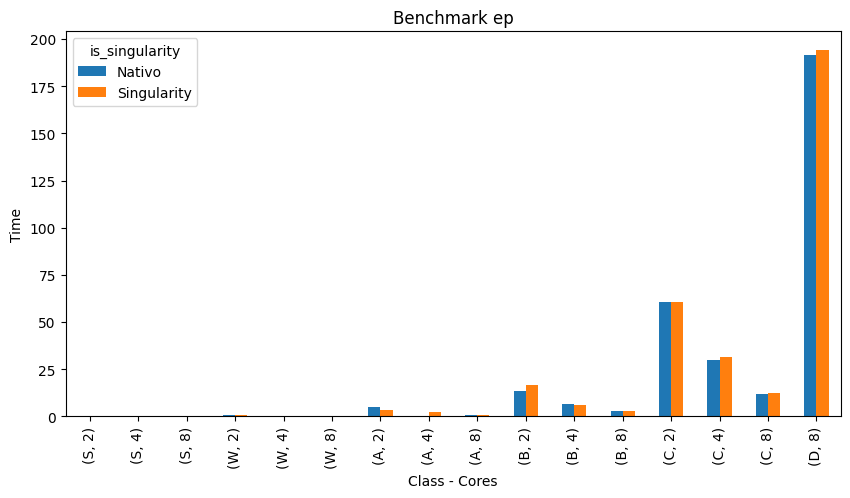

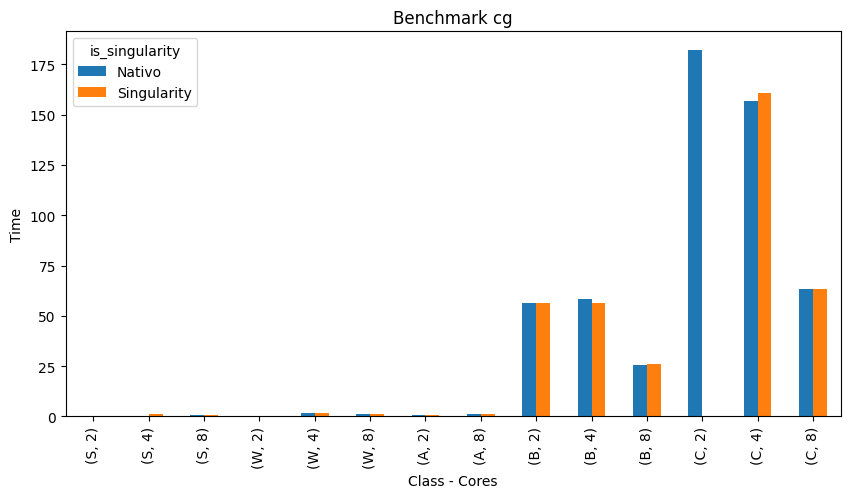

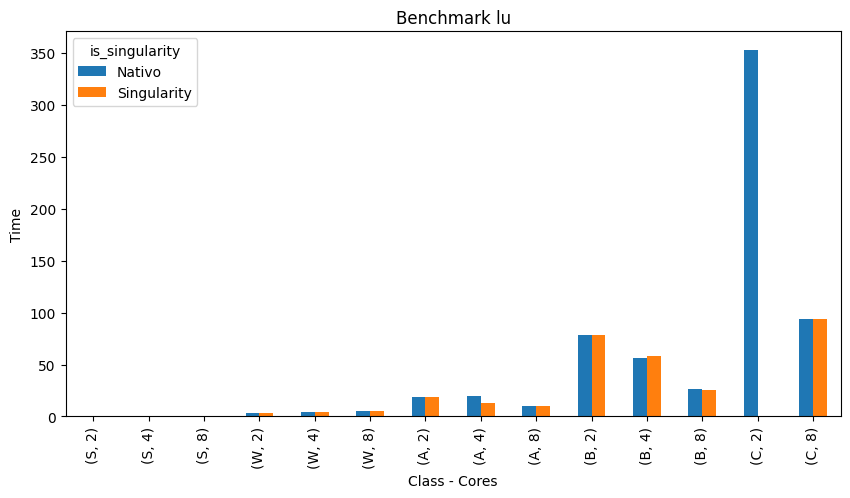

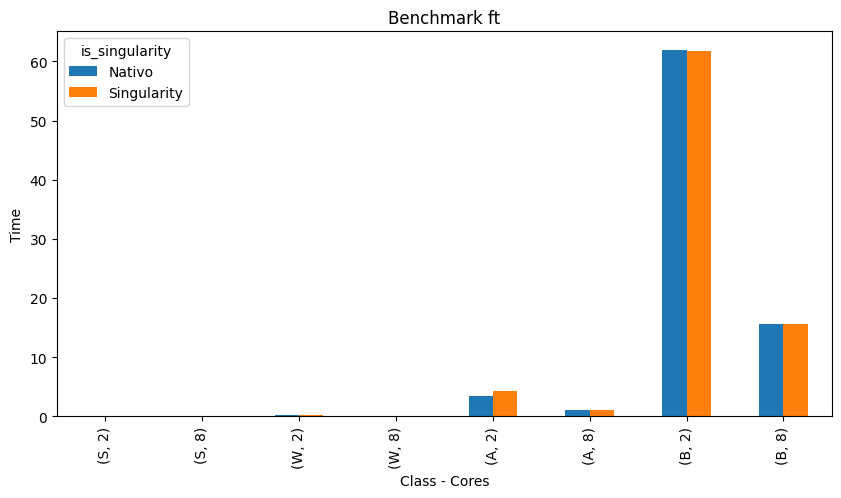

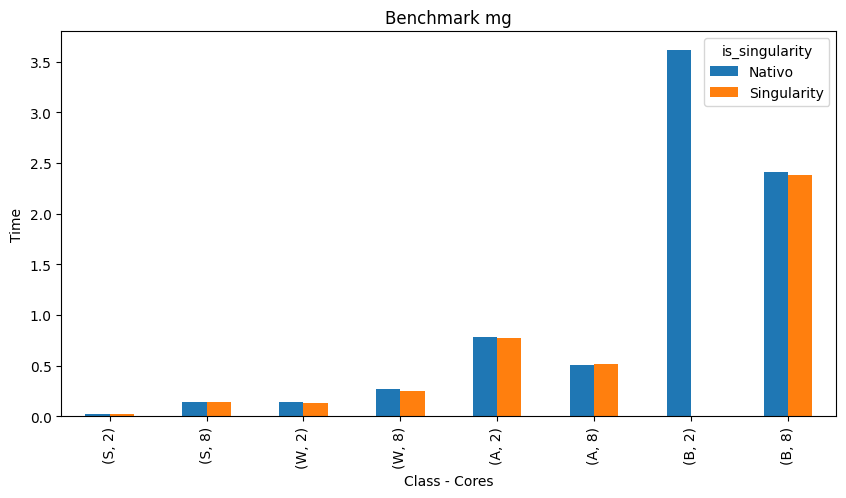

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('output.csv')

df.head()

df.isnull().sum()

df['is_singularity'] = df['is_singularity'].replace({'n': 'Nativo', 's': 'Singularity'})

benchmarks = df['benchmark'].unique()
classes = df['class'].unique()

# Para cada benchmark e classe, criar um gráfico de barras
for benchmark in benchmarks:
    for cl in classes:
        df_sub = df[(df['benchmark'] == benchmark) & (df['class'] == cl)]
        if not df_sub.empty:
            df_sub.groupby(['cores', 'is_singularity'])['time'].mean().unstack().plot(kind='bar')
            plt.title(f'{benchmark} - Class {cl}')
            plt.ylabel('Time')
            plt.show()


df['class'] = pd.Categorical(df['class'], categories=['S', 'W', 'A', 'B', 'C', 'D', 'E'], ordered=True)

for benchmark in benchmarks:
    df_sub = df[df['benchmark'] == benchmark]
    
    # Crie uma tabela dinâmica com 'class' e 'cores' como índices, 'is_singularity' como colunas e 'time' como valores
    pivot = df_sub.pivot_table(index=['class', 'cores'], columns='is_singularity', values='time')

    # Crie um gráfico de barras do DataFrame pivotado
    pivot.plot(kind='bar', figsize=(10,5))
    plt.title(f'Benchmark {benchmark}')
    plt.ylabel('Time')
    plt.xlabel('Class - Cores')
    plt.show()